In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Ice.csv')

In [ ]:
df

,tastes_excellent,look_good,satisfies_hunger,satisfies_thirst,refreshing,for_everyday,for_special,for_adults,favorite,different,cool,never_eat,fun,expensive
Nogger,0.205882,0.117647,0.127451,0.009804,0.029412,0.058824,0.107843,0.117647,0.068627,0.068627,0.078431,0.078431,0.078431,0.088235
Magnum,0.411765,0.343137,0.294118,0.019608,0.068627,0.225490,0.264706,0.392157,0.245098,0.186275,0.245098,0.029412,0.088235,0.549020
Cornetto,0.480392,0.294118,0.294118,0.049020,0.107843,0.196078,0.294118,0.401961,0.264706,0.088235,0.098039,0.029412,0.117647,0.352941
Viennetta,0.117647,0.137255,0.078431,0.000000,0.029412,0.049020,0.274510,0.284314,0.039216,0.088235,0.019608,0.088235,0.049020,0.196078
Max,0.000000,0.019608,0.009804,0.000000,0.009804,0.009804,0.000000,0.019608,0.009804,0.039216,0.019608,0.117647,0.058824,0.019608
Solero,0.235294,0.245098,0.049020,0.147059,0.225490,0.117647,0.078431,0.127451,0.107843,0.088235,0.235294,0.117647,0.137255,0.176471
Jolly,0.313725,0.147059,0.049020,0.284314,0.294118,0.225490,0.068627,0.029412,0.107843,0.098039,0.039216,0.009804,0.362745,0.029412
Calippo,0.343137,0.225490,0.088235,0.529412,0.460784,0.235294,0.078431,0.000000,0.245098,0.176471,0.254902,0.009804,0.431373,0.049020
Twinni,0.372549,0.215686,0.068627,0.313725,0.323529,0.274510,0.058824,0.029412,0.254902,0.098039,0.098039,0.019608,0.441176,0.039216
Tritti,0.019608,0.019608,0.009804,0.029412,0.019608,0.049020,0.000000,0.009804,0.019608,0.039216,0.009804,0.098039,0.058824,0.009804


In [ ]:
print(df.shape)

(11, 14)


In [ ]:
print(list(df.columns))

['tastes_excellent', 'look_good', 'satisfies_hunger', 'satisfies_thirst', 'refreshing', 'for_everyday', 'for_special', 'for_adults', 'favorite', 'different', 'cool', 'never_eat', 'fun', 'expensive']


In [ ]:
df.describe()

,tastes_excellent,look_good,satisfies_hunger,satisfies_thirst,refreshing,for_everyday,for_special,for_adults,favorite,different,cool,never_eat,fun,expensive
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.245098,0.170232,0.099822,0.129234,0.150624,0.146168,0.113191,0.130125,0.136364,0.092692,0.109626,0.063280,0.187166,0.139037
std,0.156495,0.104702,0.102057,0.173992,0.152025,0.092641,0.111123,0.155762,0.099736,0.049091,0.093608,0.043705,0.154358,0.172160
min,0.000000,0.019608,0.009804,0.000000,0.009804,0.009804,0.000000,0.000000,0.009804,0.039216,0.009804,0.009804,0.049020,0.009804
25%,0.156863,0.112745,0.039216,0.014706,0.029412,0.053922,0.039216,0.019608,0.053922,0.058824,0.029412,0.024510,0.068627,0.024510
50%,0.235294,0.147059,0.068627,0.039216,0.088235,0.166667,0.078431,0.029412,0.107843,0.088235,0.098039,0.078431,0.117647,0.049020
75%,0.357843,0.235294,0.107843,0.215686,0.259804,0.225490,0.186275,0.205882,0.245098,0.098039,0.171569,0.098039,0.299020,0.186275
max,0.480392,0.343137,0.294118,0.529412,0.460784,0.274510,0.294118,0.401961,0.264706,0.186275,0.254902,0.117647,0.441176,0.549020


# Let's find out the best ice creams in every category, so maybe we can see which company will get the biggest income.

# tastes excellent 
## lets find out which ice cream has the best taste. for that i will use pandas

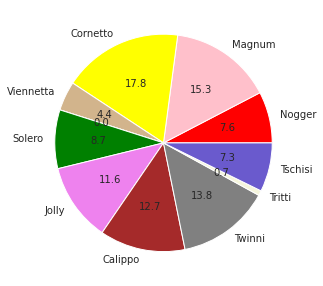

In [ ]:
te_pie = pd.DataFrame({"": df.tastes_excellent})
te_pie.plot.pie(y="",
                 autopct="%.1f",
                 legend=False,
                 colors=["red", "pink", "yellow", "tan", "orange", "green", "violet", "brown", "grey", "beige", "slateblue"],
                 fontsize=10,
                 figsize=(5, 5));

#### accordinng to pie the most deliciouse is Cornetto and is the least is Max (because it is not even on the pie)


# look good
## lets find out what the best good looking ice cream.

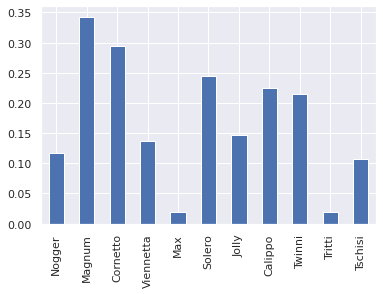

In [ ]:
df["look_good"].plot.bar()

#### accordinng to graphic the most good looking is magnum

# satisfies_hunger

In [ ]:
df_copy = df

In [ ]:
df_copy["ice_cream"] = df_copy.index
df_copy.head()

,tastes_excellent,look_good,satisfies_hunger,satisfies_thirst,refreshing,for_everyday,for_special,for_adults,favorite,different,cool,never_eat,fun,expensive,ice_cream
Nogger,0.205882,0.117647,0.127451,0.009804,0.029412,0.058824,0.107843,0.117647,0.068627,0.068627,0.078431,0.078431,0.078431,0.088235,Nogger
Magnum,0.411765,0.343137,0.294118,0.019608,0.068627,0.225490,0.264706,0.392157,0.245098,0.186275,0.245098,0.029412,0.088235,0.549020,Magnum
Cornetto,0.480392,0.294118,0.294118,0.049020,0.107843,0.196078,0.294118,0.401961,0.264706,0.088235,0.098039,0.029412,0.117647,0.352941,Cornetto
Viennetta,0.117647,0.137255,0.078431,0.000000,0.029412,0.049020,0.274510,0.284314,0.039216,0.088235,0.019608,0.088235,0.049020,0.196078,Viennetta
Max,0.000000,0.019608,0.009804,0.000000,0.009804,0.009804,0.000000,0.019608,0.009804,0.039216,0.019608,0.117647,0.058824,0.019608,Max


No handles with labels found to put in legend.


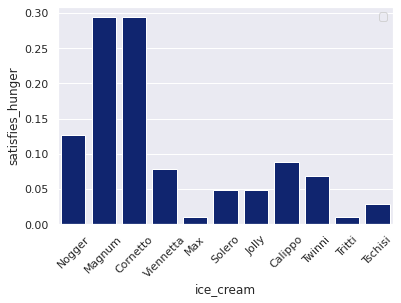

In [ ]:
sns.set_theme(style="darkgrid")
plt.plot()
sns.set_color_codes("dark")
sns.barplot(x="ice_cream", y="satisfies_hunger", data=df_copy, color="b");
plt.xticks(rotation=45)
plt.legend(ncol=1);

#### accordinng to graphic magnum and cornetto have exact the same number of "true" answers and they are the best choice if you are hungry

# satisfies_thirst


In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Pie(labels=df_copy.ice_cream, values=df_copy.satisfies_thirst, hole=.5)])
fig.show()

#### accordinng to pie plot calippo is the best choice if you are thirsty

# We can do this sort of graphics for every column, or we can try to plot radar chart with all ice_creams and their characteristics

In [ ]:
df_copy.index = np.arange(len(df_copy))
cols = df_copy.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_copy = df[cols]
df_copy.head()

,ice_cream,tastes_excellent,look_good,satisfies_hunger,satisfies_thirst,refreshing,for_everyday,for_special,for_adults,favorite,different,cool,never_eat,fun,expensive
0,Nogger,0.205882,0.117647,0.127451,0.009804,0.029412,0.058824,0.107843,0.117647,0.068627,0.068627,0.078431,0.078431,0.078431,0.088235
1,Magnum,0.411765,0.343137,0.294118,0.019608,0.068627,0.225490,0.264706,0.392157,0.245098,0.186275,0.245098,0.029412,0.088235,0.549020
2,Cornetto,0.480392,0.294118,0.294118,0.049020,0.107843,0.196078,0.294118,0.401961,0.264706,0.088235,0.098039,0.029412,0.117647,0.352941
3,Viennetta,0.117647,0.137255,0.078431,0.000000,0.029412,0.049020,0.274510,0.284314,0.039216,0.088235,0.019608,0.088235,0.049020,0.196078
4,Max,0.000000,0.019608,0.009804,0.000000,0.009804,0.009804,0.000000,0.019608,0.009804,0.039216,0.019608,0.117647,0.058824,0.019608


In [ ]:
BLUE = "#2a475e"
GREY70 = "#b3b3b3"
GREY_LIGHT = "#f2efe8"
COLORS = ["red", "pink", "yellow", "tan", "orange", "green", "violet", "brown", "grey", "#FF5A5F", "slateblue"]

# The ice cream values
ice_cream_val = df_copy["ice_cream"].values.tolist()

# The variables in the plot
VARIABLES = df_copy.columns.tolist()[1:]
VARIABLES_N = len(VARIABLES)

# The angles at which the values of the numeric variables are placed
ANGLES = [n / VARIABLES_N * 2 * np.pi for n in range(VARIABLES_N)]
ANGLES += ANGLES[:1]

# Padding used to customize the location of the tick labels
X_VERTICAL_TICK_PADDING = 5
X_HORIZONTAL_TICK_PADDING = 50    

# Angle values going from 0 to 2*pi
HANGLES = np.linspace(0, 2 * np.pi)

# Used for the equivalent of horizontal lines in cartesian coordinates plots 
# The last one is also used to add a fill which acts as a background color.
H0 = np.zeros(len(HANGLES))
H1 = np.ones(len(HANGLES)) * 0.5
H2 = np.ones(len(HANGLES))

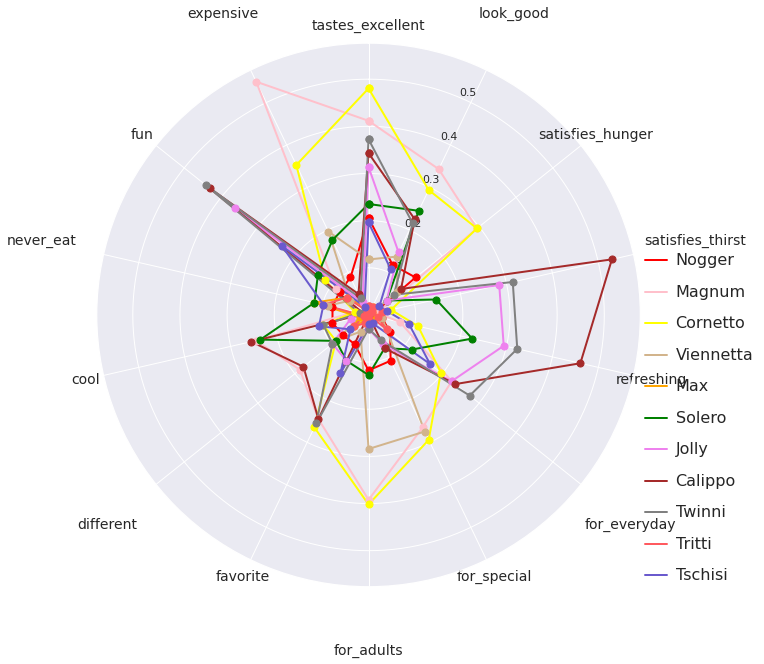

In [ ]:
# Initialize layout ----------------------------------------------
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, polar=True)


# Rotate the "" 0 degrees on top. 
# There it where the first variable, avg_bill_length, will go.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)


# Plot lines and dots --------------------------------------------
for idx, ice_cream in enumerate(ice_cream_val):
    values = df_copy.iloc[idx].drop("ice_cream").values.tolist()
    values += values[:1]
    ax.plot(ANGLES, values, c=COLORS[idx], linewidth=2, label=ice_cream)
    ax.scatter(ANGLES, values, s=50, c=COLORS[idx], zorder=10)

# Iterate through species names and colors.
# These handles contain both markers and lines.

# Set values for the angular axis (x)
ax.set_xticks(ANGLES[:-1])
ax.set_xticklabels(VARIABLES, size=14)

# Add legend

legend = ax.legend(
    loc=(1, 0),       # bottom-right
    labelspacing=1.5, # add space between labels
    frameon=False     # don't put a frame
)

# Iterate through text elements and change their properties
for text in legend.get_texts():
    text.set_fontname("Roboto") # Change default font 
    text.set_fontsize(16)       # Change default font size

# Adjust tick label positions 
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS[0::2]:
    tick.set_pad(X_VERTICAL_TICK_PADDING)
    
for tick in XTICKS[1::2]:
    tick.set_pad(X_HORIZONTAL_TICK_PADDING)

## so with the help of radar chart now it i easier to tell what is the coolest ice cream, or what is the most refreshing one.
### we can see that even though "magnum" is expensive, it is not refreshing nor does it satisfy hunger. However, it has an excellent taste and looks good. So we can assume thats why the price is high
### "cornetto" is not so expensive, but is good if you are hungry and it has an excellent taste


# Lets plot the heat map
### so now we can see the correlation

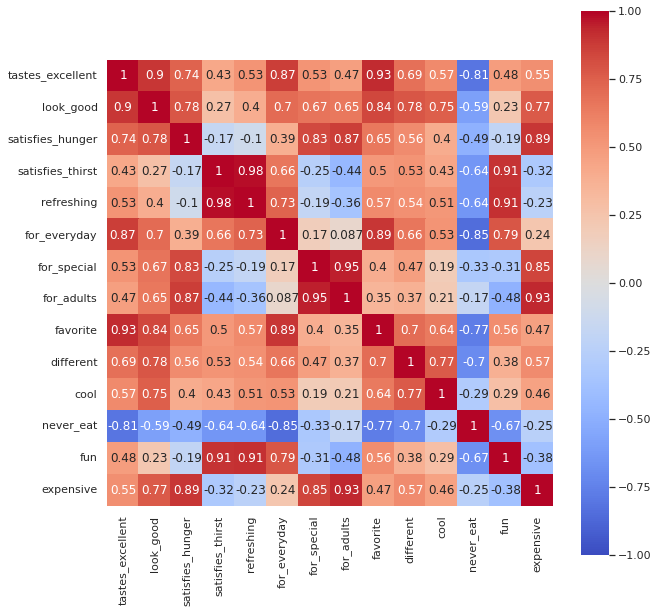

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
map = sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="coolwarm", vmin=-1, vmax=1, center= 0, ax=ax, square=True)

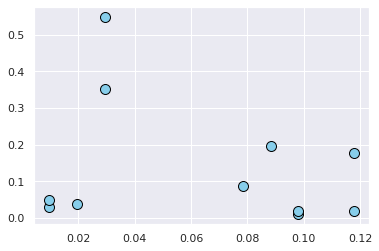

In [ ]:
# scatter plot
plt.plot('never_eat','expensive', data=df, linestyle='none', markerfacecolor='skyblue', marker="o", markeredgecolor="black", markersize=10)
plt.show()

#### On OX we have 'never_eat' column and on OY we have 'expensive'. I decieded to plot this because i wanted to show that maybe people have never eaten ice cream because of the price, but as we can see it is not exactly true

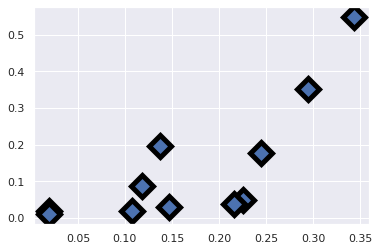

In [ ]:
plt.plot( 'look_good', 'expensive', data=df, linestyle='none', marker='D', markersize=16, markeredgecolor="black", markeredgewidth=5)
plt.show()

#### On OX we have 'look_good' column and on OY we have 'expensive'. I decieded to plot this because i wanted to show that if an ice cream is good looking than it will have a bigger cost.

# So we can build all of this scatter plots, but with a heat map it is much easier. We can see which columns depend on each others and which dont.